In [6]:
# Import modules
import matlab.engine
import matlab
import numpy as np
from obspy import Stream, Trace
from obspy.core import UTCDateTime
eng = matlab.engine.start_matlab()

In [10]:
# Function
def readSEGD(filepath,verb):
    results = eng.sercel_SEGD2_TMC_Jan25(filepath,'verbose',verb,nargout=9)
    [data_raw, time, year, julday, hour, minute, second, frequency, serialNo] = results
    data_raw = np.array(data_raw); time = np.array(data_raw); serialNo = np.array(serialNo)
    serialNo = [str(int(num)) for num in serialNo.flatten()]
    year = int(year); julday = int(julday); hour = int(hour); minute = int(minute); second = int(second); freq = int(frequency)
    return data_raw, time, year, julday, hour, minute, second, frequency, serialNo

def createStream(data,network,units,instrument_type,serial_numbers,year,julday,hour,minute,second,frequency):
    stream = Stream()
    start = UTCDateTime(year=year,julday=julday,hour=hour,minute=minute,second=second)
    # Iterate over each instrument (column) and create a Trace
    for i in range(data.shape[1]):
        # Create Trace object for each instrument
        trace = Trace()
        trace.data = data[:, i]
        trace.stats.network = network
        trace.stats.station = serial_numbers[i]
        trace.stats.channel = 'HHZ'
        trace.stats.sampling_rate = frequency
        trace.stats.starttime = start  # Set the start time
        trace.stats.serial_number = serial_numbers[i]  # Set the serial number
        trace.stats.amplitude_units = units
        trace.stats.instrument_type = instrument_type
        stream.append(trace)
    return stream

In [22]:
# Inputs
filepath = '00013148.segd';
verb = 'false'; # Do you want to print channel information.
descale = 0.000269; # Used to convert raw data to millivolts. Find this value using TraceView application.
sensitivity = 452 # Use to convert millivolts to acceleration. This is always 452.
network = 'MON'
units = 'm/s^2'
instrument_type = 'WiNG node'

In [23]:
# Read SEGD2.1 file
data_raw, time, year, julday, hour, minute, second, frequency, serialNo = readSEGD(filepath,verb)
data_mV = data_raw * descale
data_acceleration = data_mV / sensitivity;

# Convert to Obspy stream
stream = createStream(data_acceleration,network,units,instrument_type,serialNo,year,julday,hour,minute,second,frequency)

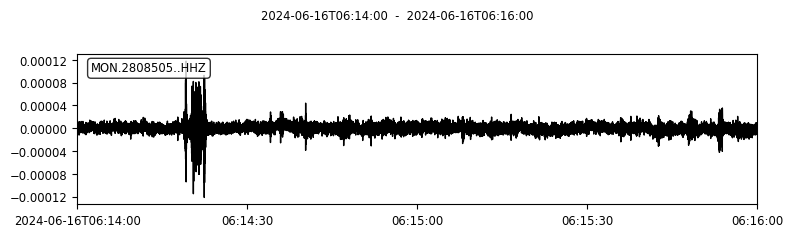

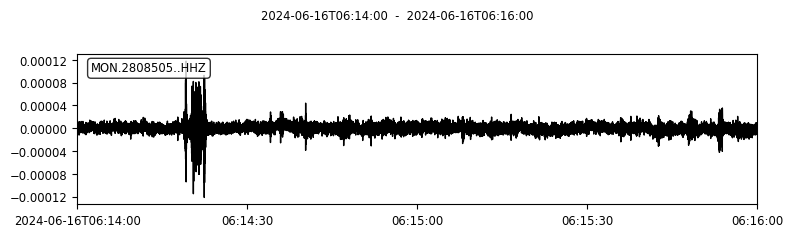

In [24]:
# Plot
stream[3].plot()

In [25]:
# Display stats
stream[3].stats

         network: MON
         station: 2808505
        location: 
         channel: HHZ
       starttime: 2024-06-16T06:14:00.000000Z
         endtime: 2024-06-16T06:16:00.000000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 30001
           calib: 1.0
 amplitude_units: m/s^2
 instrument_type: WiNG node
   serial_number: 2808505